# Testing Naive approaches

In [ ]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import mean_squared_error 

## Naive approach 1: Lag

The first approach is to see the performance of lag predictions: a predicted value is a certain value in the past (for example the previous day). 

### Data loading

In [ ]:
df_baseline = pd.read_csv("/content/drive/MyDrive/CentraleSupelec/3A/BCG_datathon/Data/clean_baseline.csv",delimiter=";")
df_baseline["Date et heure de comptage"]=pd.to_datetime(df_baseline["Date et heure de comptage"], format="%Y-%m-%d %H:%M:%S")

df_baseline.head(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc_Barré,Etat arc_Invalide
0,AV_Champs_Elysees,2022-01-01 11:00:00,524.0,8.85667,1,0,1
1,AV_Champs_Elysees,2022-01-01 07:00:00,491.0,7.71611,1,0,1
2,AV_Champs_Elysees,2022-01-01 19:00:00,997.0,46.28889,3,0,1
3,AV_Champs_Elysees,2022-01-01 18:00:00,1096.0,46.60222,3,0,1
4,AV_Champs_Elysees,2022-01-01 09:00:00,258.0,3.75445,1,0,1


In [ ]:
pd.get_dummies(df_baseline.Libelle)

,AV_Champs_Elysees,Convention,Sts_Peres
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
27543,0,0,1
27544,0,0,1
27545,0,0,1
27546,0,0,1


In [ ]:
df_chmps = df_baseline[df_baseline["Libelle"]=="AV_Champs_Elysees"]
df_sts = df_baseline[df_baseline["Libelle"]=="Sts_Peres"]
df_cnvtn = df_baseline[df_baseline["Libelle"]=="Convention"]

### Focus on Saint-Pères street

In [ ]:
df_sts.drop(columns=["Libelle", "Etat trafic", "Etat arc_Barré", "Etat arc_Invalide"], inplace=True)
df_sts.sort_values(by="Date et heure de comptage", inplace=True)
df_sts.reset_index(drop=True, inplace=True)
df_sts

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date et heure de comptage,Débit horaire,Taux d'occupation
0,2021-11-01 04:00:00,163.0,1.94556
1,2021-11-01 05:00:00,125.0,1.67778
2,2021-11-01 06:00:00,115.0,1.58444
3,2021-11-01 07:00:00,129.0,1.56222
4,2021-11-01 08:00:00,144.0,1.94278
...,...,...,...
9159,2022-12-03 20:00:00,615.0,12.91333
9160,2022-12-03 21:00:00,582.0,10.74056
9161,2022-12-03 22:00:00,566.0,10.19723
9162,2022-12-03 23:00:00,493.0,7.23500


In [ ]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

### Débit horaire

In [ ]:
df_sts_debit = df_sts.drop(columns=["Taux d'occupation"]).copy()

#### Lag: 1 day

In [ ]:
df_sts_debit_lag= df_sts_debit.copy()

In [ ]:
df_sts_debit_lag["Lag_1"] = df_sts_debit_lag["Débit horaire"].shift(24)

In [ ]:
def rmse(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
# Here there are no real predictions. 

df_sts_debit_lag.dropna(inplace=True)

print("The RMSE for a naive lag prediction on one day is:", rmse(df_sts_debit_lag["Débit horaire"],df_sts_debit_lag["Lag_1"]))

The RMSE for a naive lag prediction on one day is: 109.6240026392759


#### Testing multiple lag values

In [ ]:
df_sts_debit_lag["Lag_2"] = df_sts_debit_lag["Débit horaire"].shift(2*24)
df_sts_debit_lag["Lag_3"] = df_sts_debit_lag["Débit horaire"].shift(3*24)
df_sts_debit_lag["Lag_4"] = df_sts_debit_lag["Débit horaire"].shift(4*24)
df_sts_debit_lag["Lag_5"] = df_sts_debit_lag["Débit horaire"].shift(5*24)
df_sts_debit_lag["Lag_6"] = df_sts_debit_lag["Débit horaire"].shift(6*24)
df_sts_debit_lag["Lag_7"] = df_sts_debit_lag["Débit horaire"].shift(7*24)

In [ ]:

for i in range (2,8):
  lag_str = "Lag_"+str(i)
  y_pred=df_sts_debit_lag[lag_str]

  df_sts_debit_lag.dropna(inplace=True)
  y_true=df_sts_debit_lag["Débit horaire"]



  print(f"The RMSE for a naive lag prediction on {i} days is:", rmse(y_true,y_pred))

The RMSE for a naive lag prediction on 2 days is: 143.29862574843662
The RMSE for a naive lag prediction on 3 days is: 156.3603672913672
The RMSE for a naive lag prediction on 4 days is: 159.87878642955806
The RMSE for a naive lag prediction on 5 days is: 155.19556385496674
The RMSE for a naive lag prediction on 6 days is: 140.0984268407822
The RMSE for a naive lag prediction on 7 days is: 129.2611746294874


In [ ]:
df_sts["Lag_14"] = df_sts["Débit horaire"].shift(7*24*2)
X=df_sts["Lag_14"]
y=df_sts["Débit horaire"]

X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

print("The RMSE for a naive lag prediction on 2 weeks is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on 2 weeks is: 153.56063398573545


<ipython-input-52-a669fcef6ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_14"] = df_sts["Débit horaire"].shift(7*24*2)


In [ ]:
df_sts["Lag_1month"] = df_sts["Débit horaire"].shift(7*24*4)
X=df_sts["Lag_1month"]
y=df_sts["Débit horaire"]

X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

print("The RMSE for a naive lag prediction on 1 month is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on 1 month is: 173.41095487513778


<ipython-input-53-dd9bdbada029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_1month"] = df_sts["Débit horaire"].shift(7*24*4)


#### Rolling average

In [ ]:
df_sts_rolling = df_sts.set_index("Date et heure de comptage")
df_sts_rolling


,Débit horaire
Date et heure de comptage,
2021-11-01 04:00:00,163.0
2021-11-01 05:00:00,125.0
2021-11-01 06:00:00,115.0
2021-11-01 07:00:00,129.0
2021-11-01 08:00:00,144.0
...,...
2022-12-03 20:00:00,615.0
2022-12-03 21:00:00,582.0
2022-12-03 22:00:00,566.0


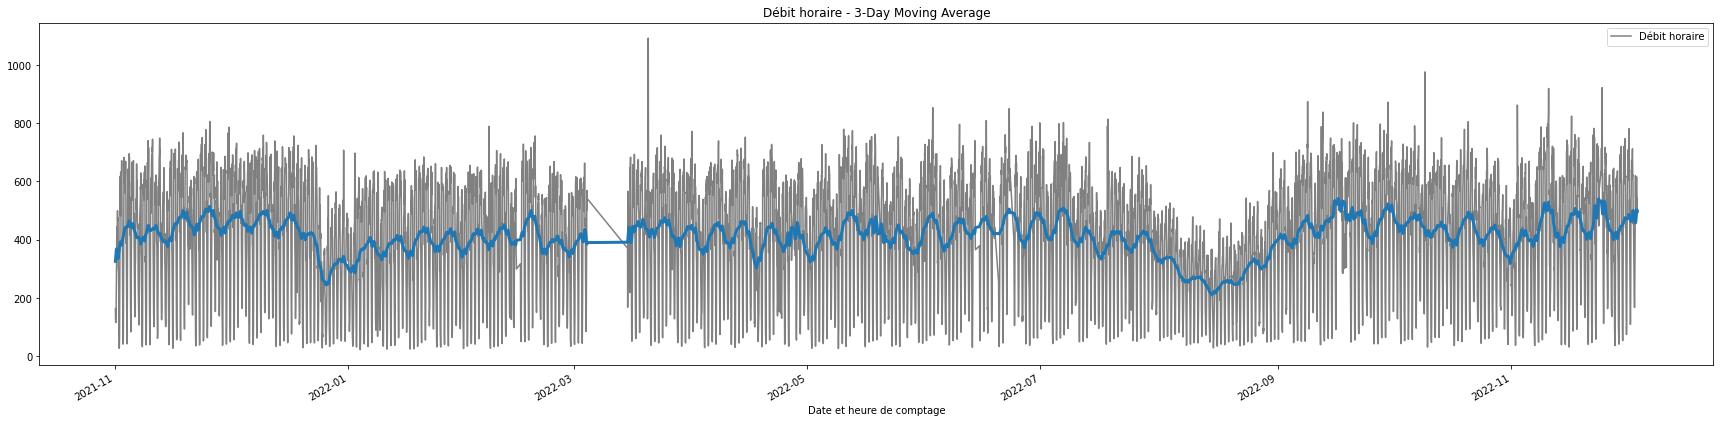

In [ ]:
moving_average_3_days = df_sts_rolling.rolling(
    window=24*3,       # 3-day window
    center=True,      # puts the average at the center of the window
    min_periods=24,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_sts_rolling.plot(color="0.5",figsize=(30, 7))
moving_average_3_days.plot(
    ax=ax, linewidth=3, title="Débit horaire - 3-Day Moving Average", legend=False,
);

In [ ]:
rmse_moving_average_3_days = rmse(df_sts_rolling["Débit horaire"],moving_average_3_days["Débit horaire"])
rmse_moving_average_3_days

188.86692568672902

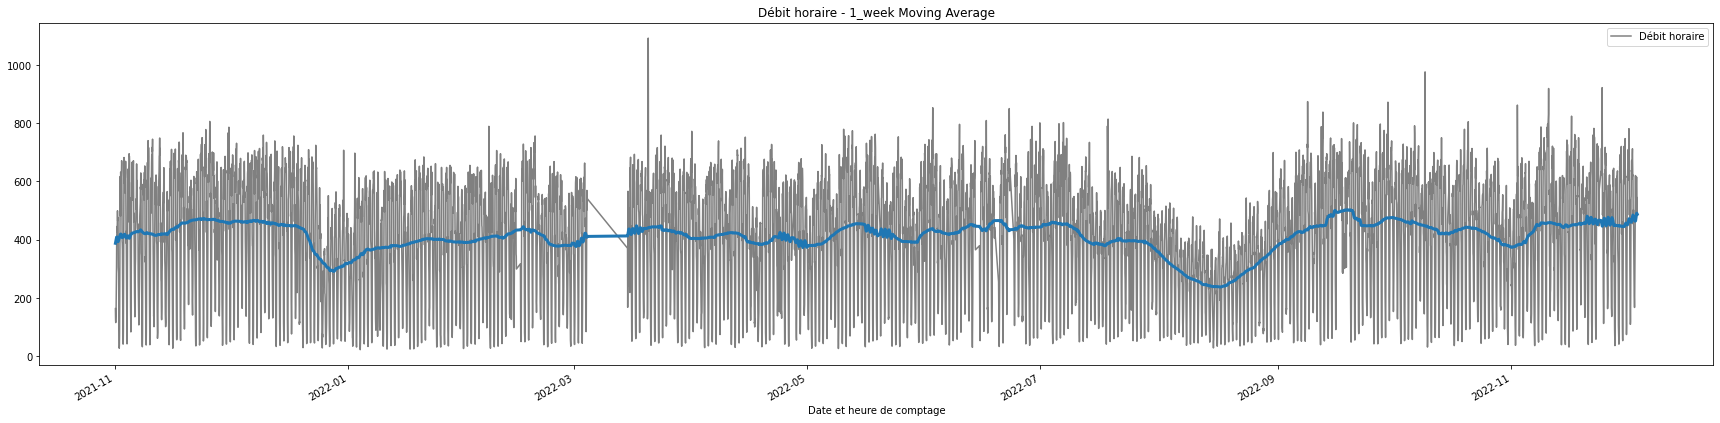

In [ ]:
moving_average_1_week = df_sts_rolling.rolling(
    window=24*7,       # 3-day window
    center=True,      # puts the average at the center of the window
    min_periods=24,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_sts_rolling.plot(color="0.5",figsize=(30, 7))
moving_average_1_week.plot(
    ax=ax, linewidth=3, title="Débit horaire - 1_week Moving Average", legend=False,
);

In [ ]:
rmse_moving_average_1_week = rmse(df_sts_rolling["Débit horaire"],moving_average_1_week["Débit horaire"])
rmse_moving_average_1_week

192.7219624015858

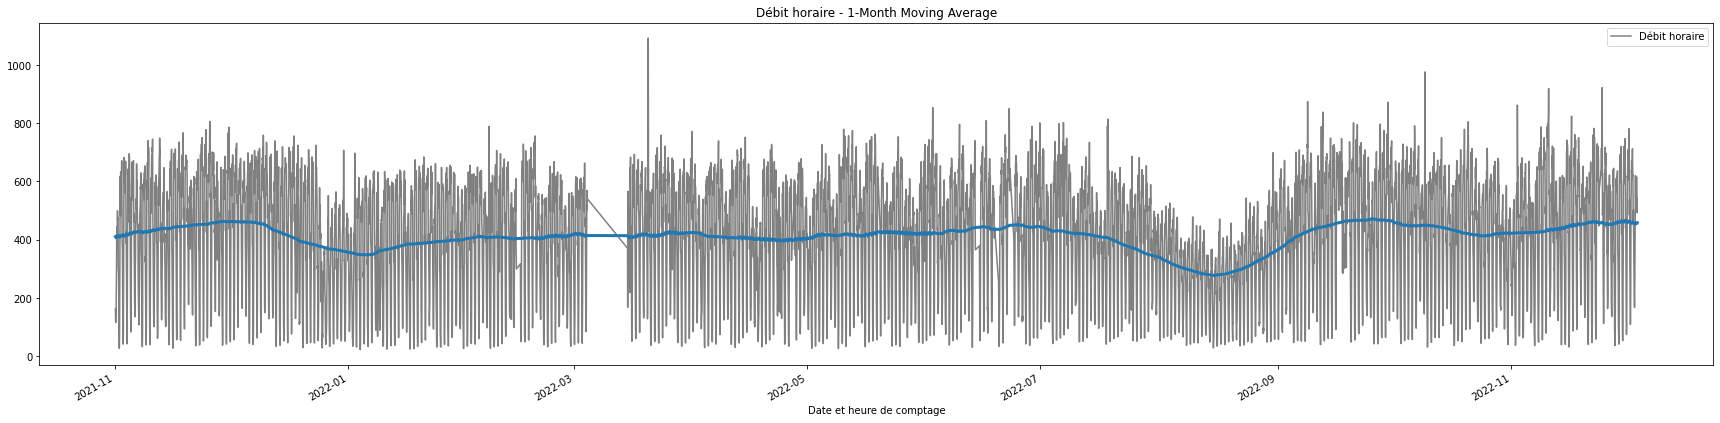

In [ ]:
moving_average_1_month = df_sts_rolling.rolling(
    window=24*7*4,       # 3-day window
    center=True,      # puts the average at the center of the window
    min_periods=24,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_sts_rolling.plot(color="0.5",figsize=(30, 7))
moving_average_1_month.plot(
    ax=ax, linewidth=3, title="Débit horaire - 1-Month Moving Average", legend=False,
);

In [ ]:
rmse_moving_average_1_month = rmse(df_sts_rolling["Débit horaire"],moving_average_1_month["Débit horaire"])
rmse_moving_average_1_month

193.75220846093657

### Taux d'occupation

#### Lag: 1 day

In [ ]:
df_sts["Lag_1"] = df_sts["Débit horaire"].shift(24)

<ipython-input-40-6d1c1abec74c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_1"] = df_sts["Débit horaire"].shift(24)


In [ ]:
X=df_sts["Lag_1"]
y=df_sts["Débit horaire"]

X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

In [ ]:
def rmse(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
# Here there are no real predictions. 

print("The RMSE for a naive lag prediction on one day is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on one day is: 112.03710176237661


#### Testing multiple lag values

In [ ]:
df_sts["Lag_2"] = df_sts["Débit horaire"].shift(2*24)
df_sts["Lag_3"] = df_sts["Débit horaire"].shift(3*24)
df_sts["Lag_4"] = df_sts["Débit horaire"].shift(4*24)
df_sts["Lag_5"] = df_sts["Débit horaire"].shift(5*24)
df_sts["Lag_6"] = df_sts["Débit horaire"].shift(6*24)
df_sts["Lag_7"] = df_sts["Débit horaire"].shift(7*24)

<ipython-input-44-ebec9f6eb754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_2"] = df_sts["Débit horaire"].shift(2*24)
<ipython-input-44-ebec9f6eb754>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_3"] = df_sts["Débit horaire"].shift(3*24)
<ipython-input-44-ebec9f6eb754>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
for i in range (2,8):
  lag_str = "Lag_"+str(i)
  X=df_sts[lag_str]
  y=df_sts["Débit horaire"]

  X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

  print(f"The RMSE for a naive lag prediction on {i} days is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on 2 days is: 144.3813972984698
The RMSE for a naive lag prediction on 3 days is: 160.53860157279775
The RMSE for a naive lag prediction on 4 days is: 163.4319505717189
The RMSE for a naive lag prediction on 5 days is: 156.9093391230758
The RMSE for a naive lag prediction on 6 days is: 140.9229691116119
The RMSE for a naive lag prediction on 7 days is: 131.05161380081506


In [ ]:
df_sts["Lag_14"] = df_sts["Débit horaire"].shift(7*24*2)
X=df_sts["Lag_14"]
y=df_sts["Débit horaire"]

X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

print("The RMSE for a naive lag prediction on 2 weeks is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on 2 weeks is: 153.56063398573545


<ipython-input-52-a669fcef6ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_14"] = df_sts["Débit horaire"].shift(7*24*2)


In [ ]:
df_sts["Lag_1month"] = df_sts["Débit horaire"].shift(7*24*4)
X=df_sts["Lag_1month"]
y=df_sts["Débit horaire"]

X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,test_size=0.3)

print("The RMSE for a naive lag prediction on 1 month is:", rmse(y_test,X_test))

The RMSE for a naive lag prediction on 1 month is: 173.41095487513778


<ipython-input-53-dd9bdbada029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts["Lag_1month"] = df_sts["Débit horaire"].shift(7*24*4)
